# Multicollinearity & VIFs

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


1.Use seaborn to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset. You might also investigate how to add color (hue) for the house style or neighborhood. Use the plot to answer the first quiz questions below.

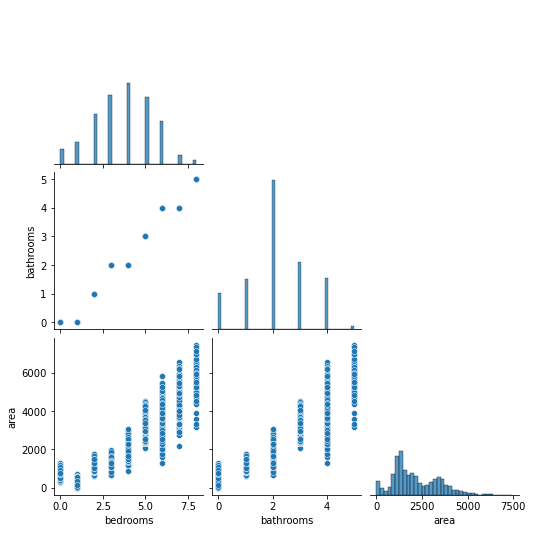

In [5]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']], corner = True);

#### Observations:
- These variables all appear to have positive correlations with one another, raisng the problem of multicollinearity with number of bedrooms and pathrooms appearing to be more correlated


2. Earlier, we fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase.

Now we'll fit a linear model to predict a **home price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. Don't forget an intercept.

In [9]:
df['intercept'] = 1

lm = sm.OLS(df['price'],df[['intercept', 'bedrooms','bathrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        11:32:31   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Redflags for multicollinearity:
- Contrary to what we'd expect Bedrooms seem to have a flipped coefficient - showing a counter intuitive relatinship to price compared to what we expect. 
- This is an indicatory of mutlicollinearity

### VIFs

#### Colinearity
[Colinearity](https://etav.github.io/python/vif_factor_python.html) is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. 

#### Multicolinearity
Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

#### VIF
The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [24]:
# since we've run multiple regression, we'll go to step 2 and calculate VIF
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif


,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [26]:
X

,Intercept,area,bedrooms,bathrooms
0,1.0,1188.0,3.0,2.0
1,1.0,3512.0,5.0,3.0
2,1.0,1134.0,3.0,2.0
3,1.0,1940.0,4.0,2.0
4,1.0,2208.0,6.0,4.0
...,...,...,...,...
6023,1.0,757.0,0.0,0.0
6024,1.0,3540.0,5.0,3.0
6025,1.0,1518.0,2.0,1.0
6026,1.0,2270.0,4.0,2.0


### QUESTIONS:
Q1. Does VIF suggest we remove all the variables from the model becasue they all have VIFS greater than 10?

Answer: No. Start off removing one of the high VIF variables (bedrooms/bathrooms) which will reduce the VIF for the other high VIF variable.


**TASK:** 
1. Remove **bathrooms** from your above model. Refit the multiple linear regression model and 
2. Re-compute the VIFs. 

In [17]:
# 1
lm = sm.OLS(df['price'], df[['intercept','bedrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        11:51:34   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# recompute vif
cols = ['intercept','bedrooms','area']

vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(df[cols].values, i) for i in range(len(cols))]
vif_df['features'] = cols
vif_df.round(1)

,vif,features
0,6.1,intercept
1,5.3,bedrooms
2,5.3,area
